## BDA 602: Multiple Linear Regression

### Ryan Paul Lafler

### *Last edited on Feb. 20, 2024*

In [6]:
# Dependencies
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Import DataFrame (CSV file):
credit_df = pd.read_csv(
    "Credit-Card-Purchases.csv"
)
credit_df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


Text(0.5, 0, 'Log-Dollars')

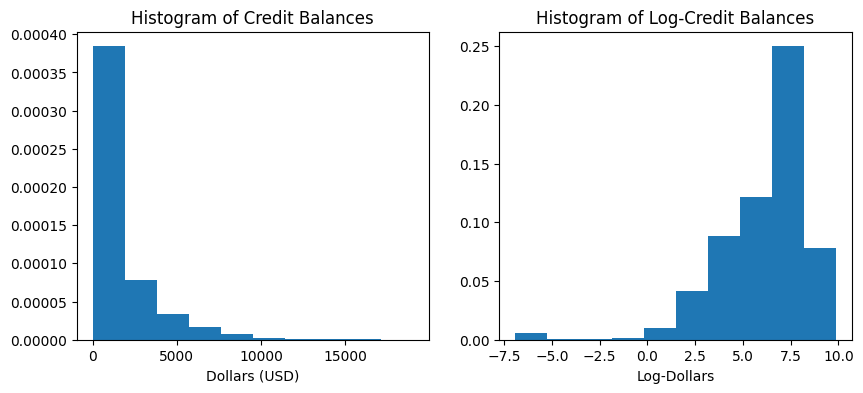

In [25]:
# Response is normally distributed:
response = credit_df["BALANCE"]

# Log-Response that removes unnecessary 0's and unskews the positive skew:
log_response = np.log(credit_df["BALANCE"] + 0.001).dropna()

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax[0].hist(response, density=True)
ax[0].set_title("Histogram of Credit Balances")
ax[0].set_xlabel("Dollars (USD)")

ax[1].hist(log_response, density=True)
ax[1].set_title("Histogram of Log-Credit Balances")
ax[1].set_xlabel("Log-Dollars")

In [27]:
# Prepare DataFrame:
ols_reg1_df = pd.DataFrame(
    {
        "response": log_response,
        "purchases": credit_df["PURCHASES"],
    }
)

# Simple Linear Regression:
ols_reg1 = smf.ols("response ~ purchases", data=ols_reg1_df)
fit_reg1 = ols_reg1.fit()  # Fit (train) the response to the predictor
fit_reg1.summary()

## DECISION RULE FOR COVARIATE SIGNIFICANCE ##
# p-value close to 0 --> result is statistically significant!
# DECISION RULE: p-value < 0.05 (5%), statistically significant.
## p-value >= 0.05 (5%), statistically insignificant.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     235.8
Date:                Tue, 20 Feb 2024   Prob (F-statistic):           1.53e-52
Time:                        20:54:04   Log-Likelihood:                -20233.
No. Observations:                8950   AIC:                         4.047e+04
Df Residuals:                    8948   BIC:                         4.049e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.8960      0.027    217.556      0.000       5.843       5.949
purchases      0.0002   1.15e-05     15.355      0.000       0.000       0.000
==============================================================================
Omnibus:                     3951.860   Durbin-Watson:                   1.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26818.452
Skew:                          -1.997   Prob(JB):                         0.00
Kurtosis:                      10.481   Cond. No.                     2.61e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.61e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
# Higher-order terms with a quadrtic interaction model:
# Prepare DataFrame (Quadratic Model):
ols_reg2_df = pd.DataFrame(
    {
        "response": log_response,
        "purchases": credit_df["PURCHASES"],  # main-effect term
        "credit_limit": credit_df["CREDIT_LIMIT"],  # main-effect term
        "interaction": credit_df["PURCHASES"] * credit_df["CREDIT_LIMIT"],  # 2-way interaction term --> makes regression model more flexible,
        "credit_limit_squared": credit_df["CREDIT_LIMIT"] ** 2,  # Higher-order term (quadratic)
    }
)

# OLS Regression assumes that terms are added to each other:
ols_reg2 = smf.ols(formula="response ~ purchases + credit_limit + interaction + credit_limit_squared", data=ols_reg2_df)
fit_reg2 = ols_reg2.fit()
fit_reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               response   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     203.2
Date:                Tue, 20 Feb 2024   Prob (F-statistic):          4.62e-167
Time:                        21:09:02   Log-Likelihood:                -19958.
No. Observations:                8949   AIC:                         3.993e+04
Df Residuals:                    8944   BIC:                         3.996e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.0027      0.053     95.111      0.000       4.900       5.106
purchases                0.0002   2.54e-05      6.984      0.000       0.000       0.000
credit_limit             0.0003   1.89e-05     13.934      0.000       0.000       0.000
interaction           -7.01e-09   1.93e-09     -3.631      0.000   -1.08e-08   -3.23e-09
credit_limit_squared -7.263e-09   1.29e-09     -5.610      0.000    -9.8e-09   -4.73e-09
==============================================================================
Omnibus:                     4310.634   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            32120.246
Skew:                          -2.187   Prob(JB):                         0.00
Kurtosis:                      11.186   Cond. No.                     1.51e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""